In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from datetime import datetime
import matplotlib as mpl

spreadsheet_id = "YOUR_SPREADSHEET_ID" # Replace with your Sheet ID
sheet_id = "0" # Replace with your GID (0 is usually the first sheet)

url = f"https://docs.google.com/spreadsheets/d/16HNvRGn6rM0YFKnyvNpQlfmxrgw8ugTsu9iZ6fjQORQ/export?gid=0&format=csv"


df = pd.read_csv(url)
df['Military_Time']=pd.to_datetime(df['Time'],format='%I:%M %p').dt.strftime('%H:%M')
df['datetime_col'] = pd.to_datetime(df['Date'] + ' ' + df['Military_Time'])
df

,Date,Time,Volume [mL],Food,Total Feed Volume [mL],Military_Time,datetime_col
0,1/15/2026,3:00 PM,55,Thickened Breast Milk,82,15:00,2026-01-15 15:00:00
1,1/15/2026,6:00 PM,43,Thickened Breast Milk,82,18:00,2026-01-15 18:00:00
2,1/15/2026,9:00 PM,37,Thickened Breast Milk,102,21:00,2026-01-15 21:00:00
3,1/16/2026,1:00 AM,52,Thickened Breast Milk,102,01:00,2026-01-16 01:00:00
4,1/16/2026,5:00 AM,58,Thickened Breast Milk,102,05:00,2026-01-16 05:00:00
...,...,...,...,...,...,...,...
81,1/27/2026,5:00 AM,66,AR,107,05:00,2026-01-27 05:00:00
82,1/27/2026,9:00 AM,46,AR,87,09:00,2026-01-27 09:00:00
83,1/27/2026,12:00 PM,66,AR,92,12:00,2026-01-27 12:00:00
84,1/27/2026,3:00 PM,69,AR,92,15:00,2026-01-27 15:00:00


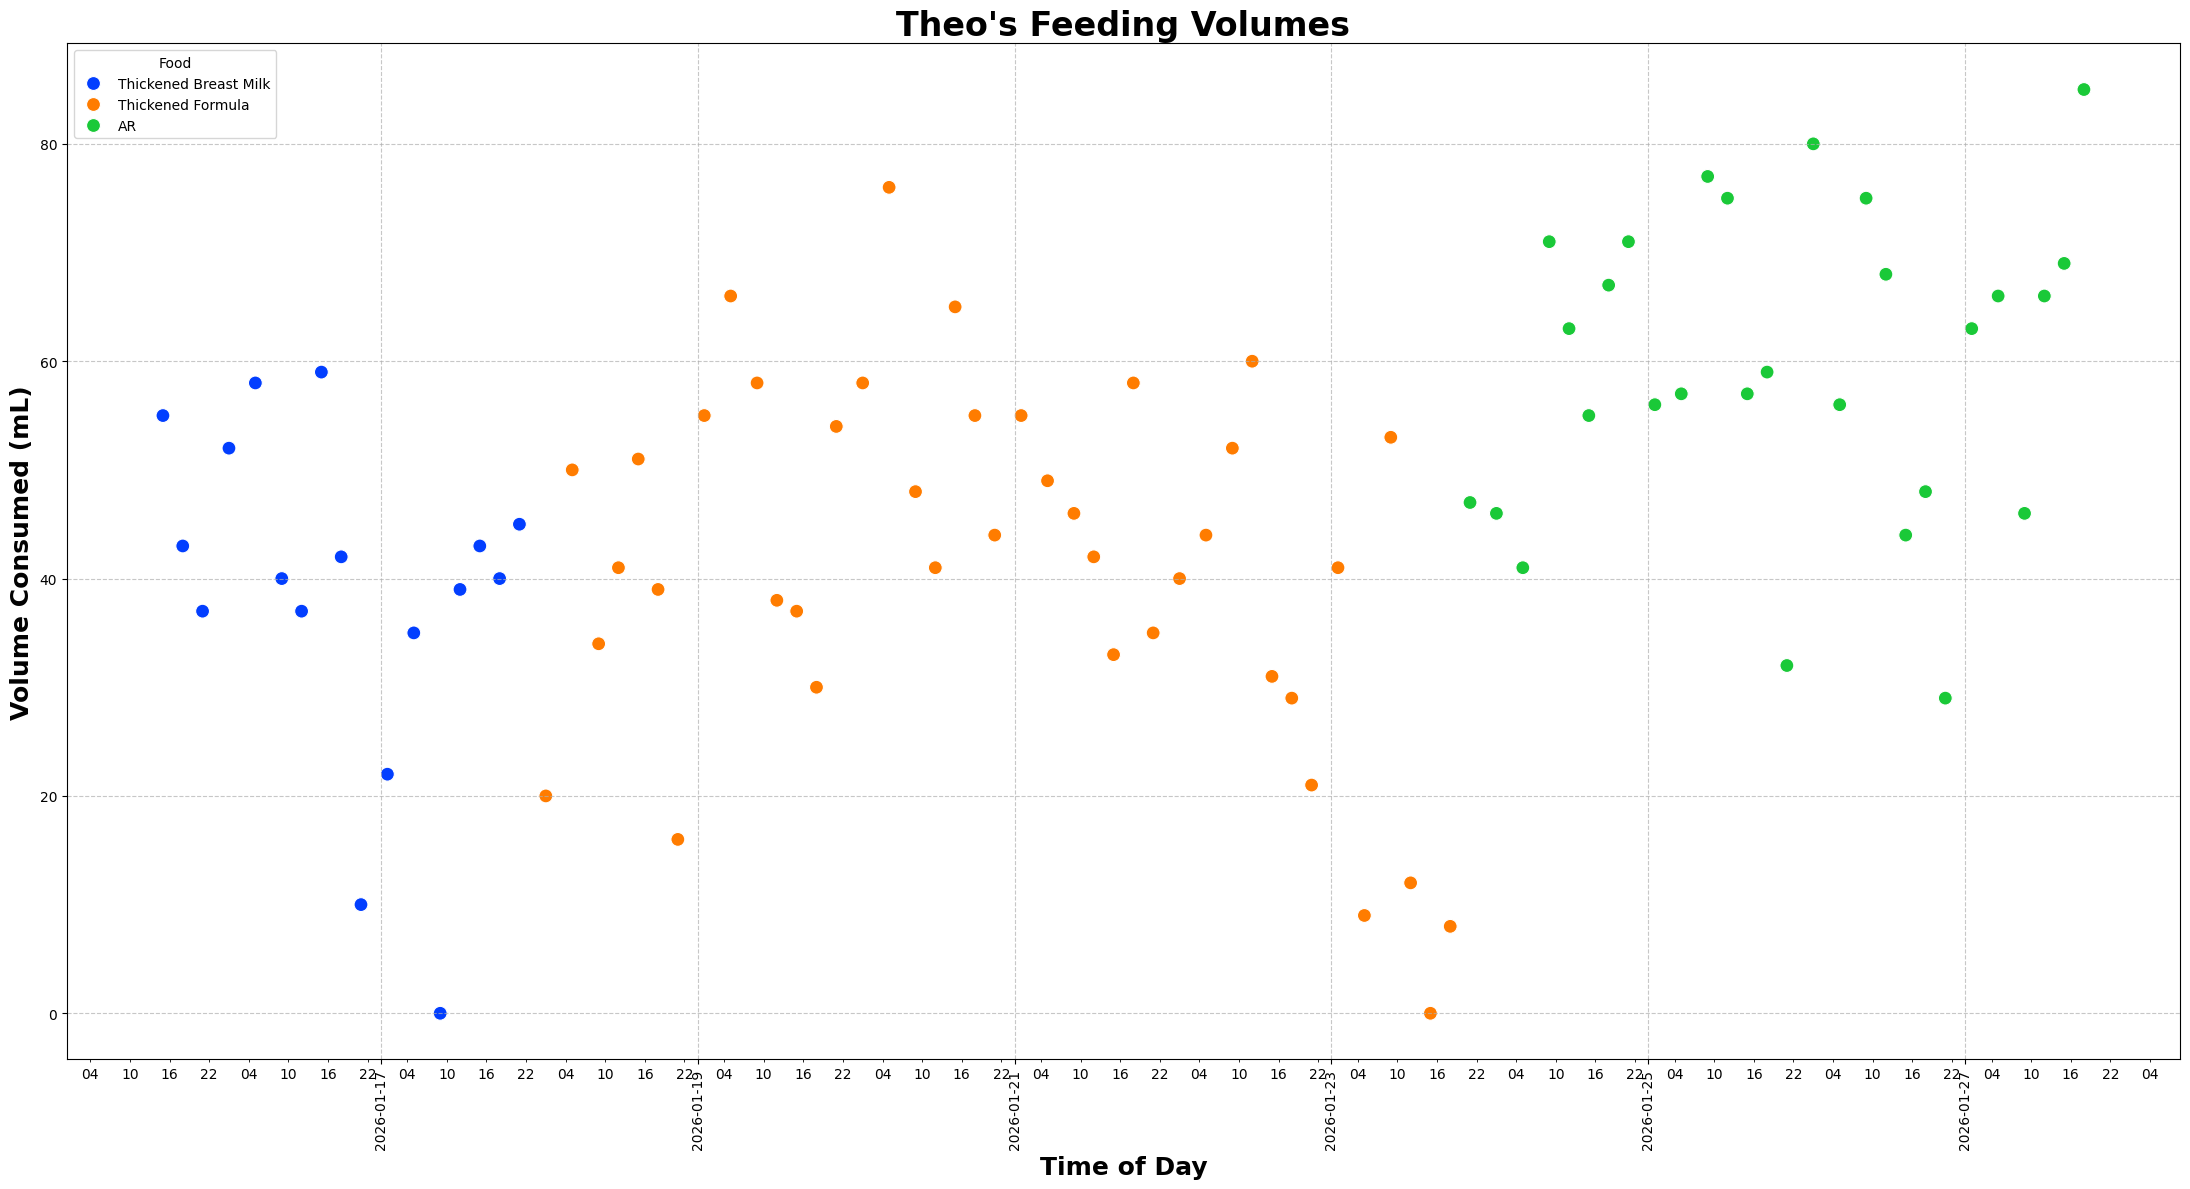

In [2]:
amounts = df['Volume [mL]'] # Amount in ml
times = df['datetime_col']

# 2. Setup the Plot
fig, ax = plt.subplots(figsize=(22, 12))

# 3. Plot the data
# Plotting with a marker 'o' to see specific feed times
xticks = df.datetime_col.to_list()
#ax.plot(times, amounts, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
sns.scatterplot(data=df,x='datetime_col', y='Volume [mL]', hue='Food', palette='bright',s=100)

# 4. Customize the plot (Labels, Title, Formatting)
ax.set_title("Theo's Feeding Volumes", fontsize=24, weight = 'bold')
ax.set_ylabel("Volume Consumed (mL)", fontsize=18, weight = 'bold')
ax.set_xlabel("Time of Day", fontsize=18, weight = 'bold')

# Format the X-axis to show hours clearly
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%I:%M'))
#fig.autofmt_xdate() # Rotates the labels to prevent overlap
plt.xticks(rotation=90)
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(24), interval=6, tz=None))
date_form = mdates.DateFormatter("%H")
ax.xaxis.set_minor_formatter(date_form)

# Add grid lines for easier reading
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

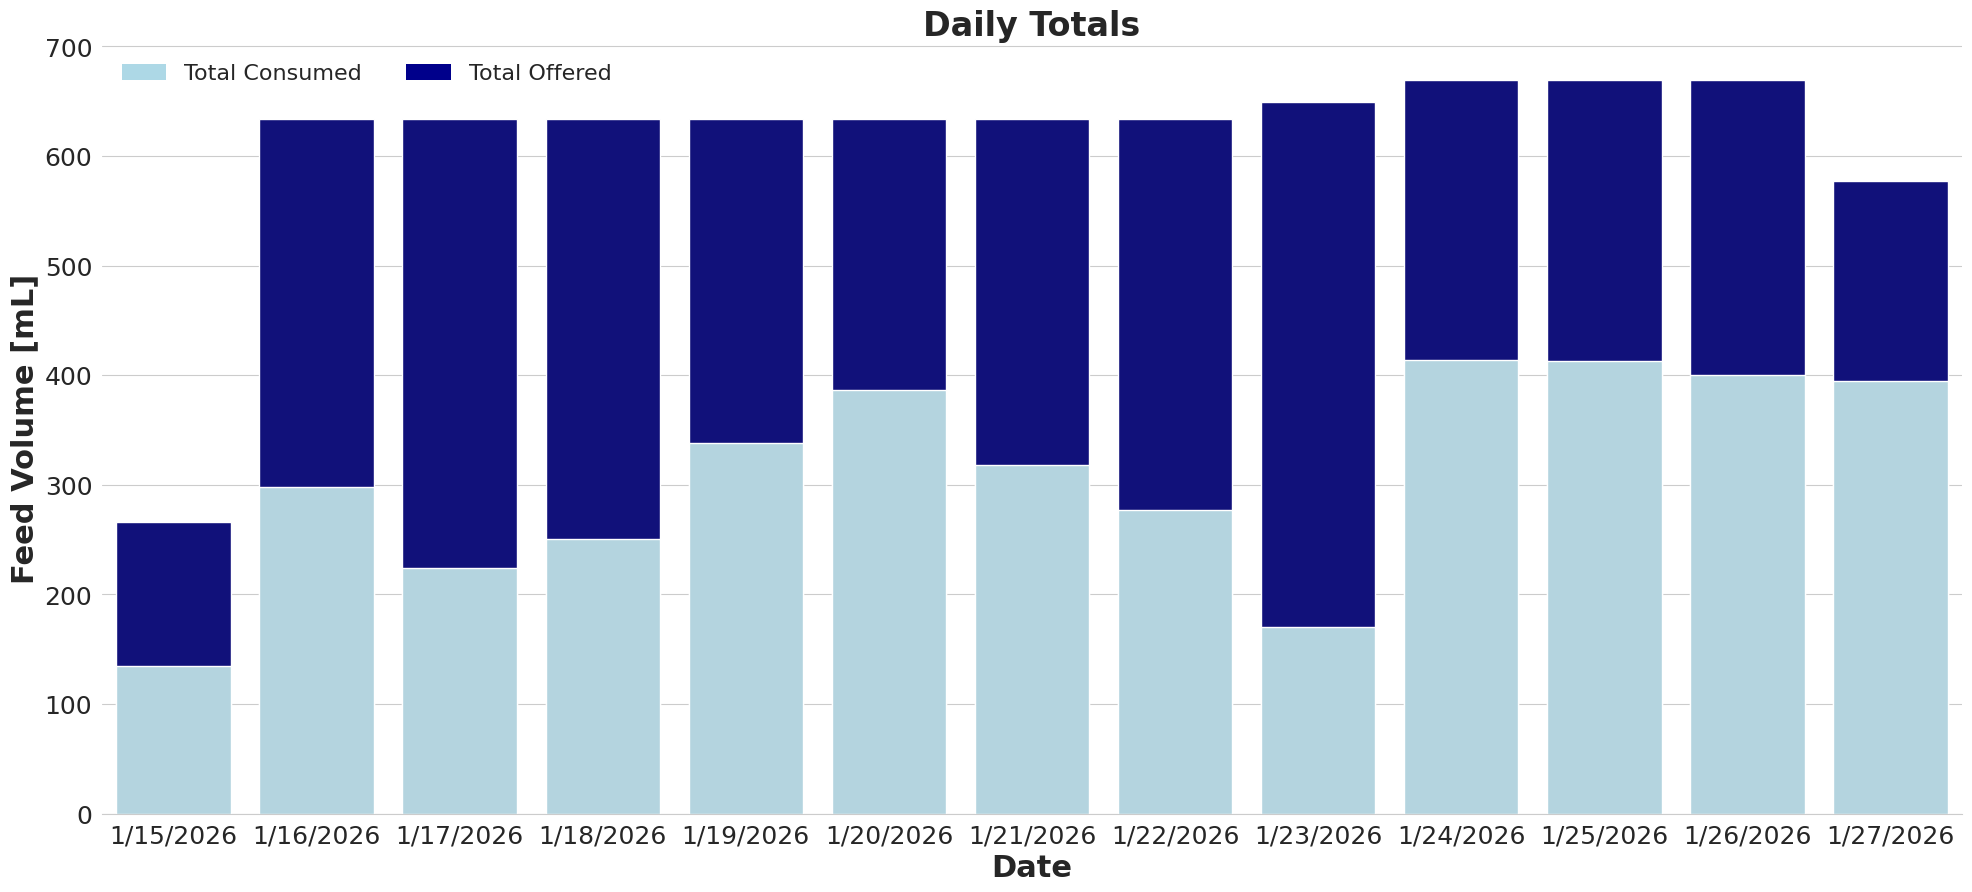

In [3]:
# Create Bar Plot
dailyTotals = df.groupby('Date')['Volume [mL]'].sum().reset_index()
dailyMax = df.groupby('Date')['Total Feed Volume [mL]'].sum().reset_index()

#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "Total Offered"
ax = sns.barplot(x = dailyMax['Date'], y = dailyMax['Total Feed Volume [mL]'], color = "darkblue")
ax.set_title("Daily Totals", fontsize=24, weight = 'bold')
#Plot 2 - overlay - "Total Daily Consumption"
bottom_plot = sns.barplot(x = dailyTotals['Date'], y = dailyTotals['Volume [mL]'], color = "lightblue")


topbar = plt.Rectangle((0,0),1,1,fc="darkblue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='lightblue',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Total Consumed', 'Total Offered'], loc=0, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
#bottom_plot.set_ylabel("Feed Volume [mL]")
#bottom_plot.set_xlabel("Date")
ax.set_ylabel("Feed Volume [mL]", fontsize=22, weight = 'bold')
ax.set_xlabel("Date", fontsize=22, weight = 'bold')
ax.tick_params(axis='both', labelsize=18)
#Set fonts to consistent 16pt size
#for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
#             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#    item.set_fontsize(16)

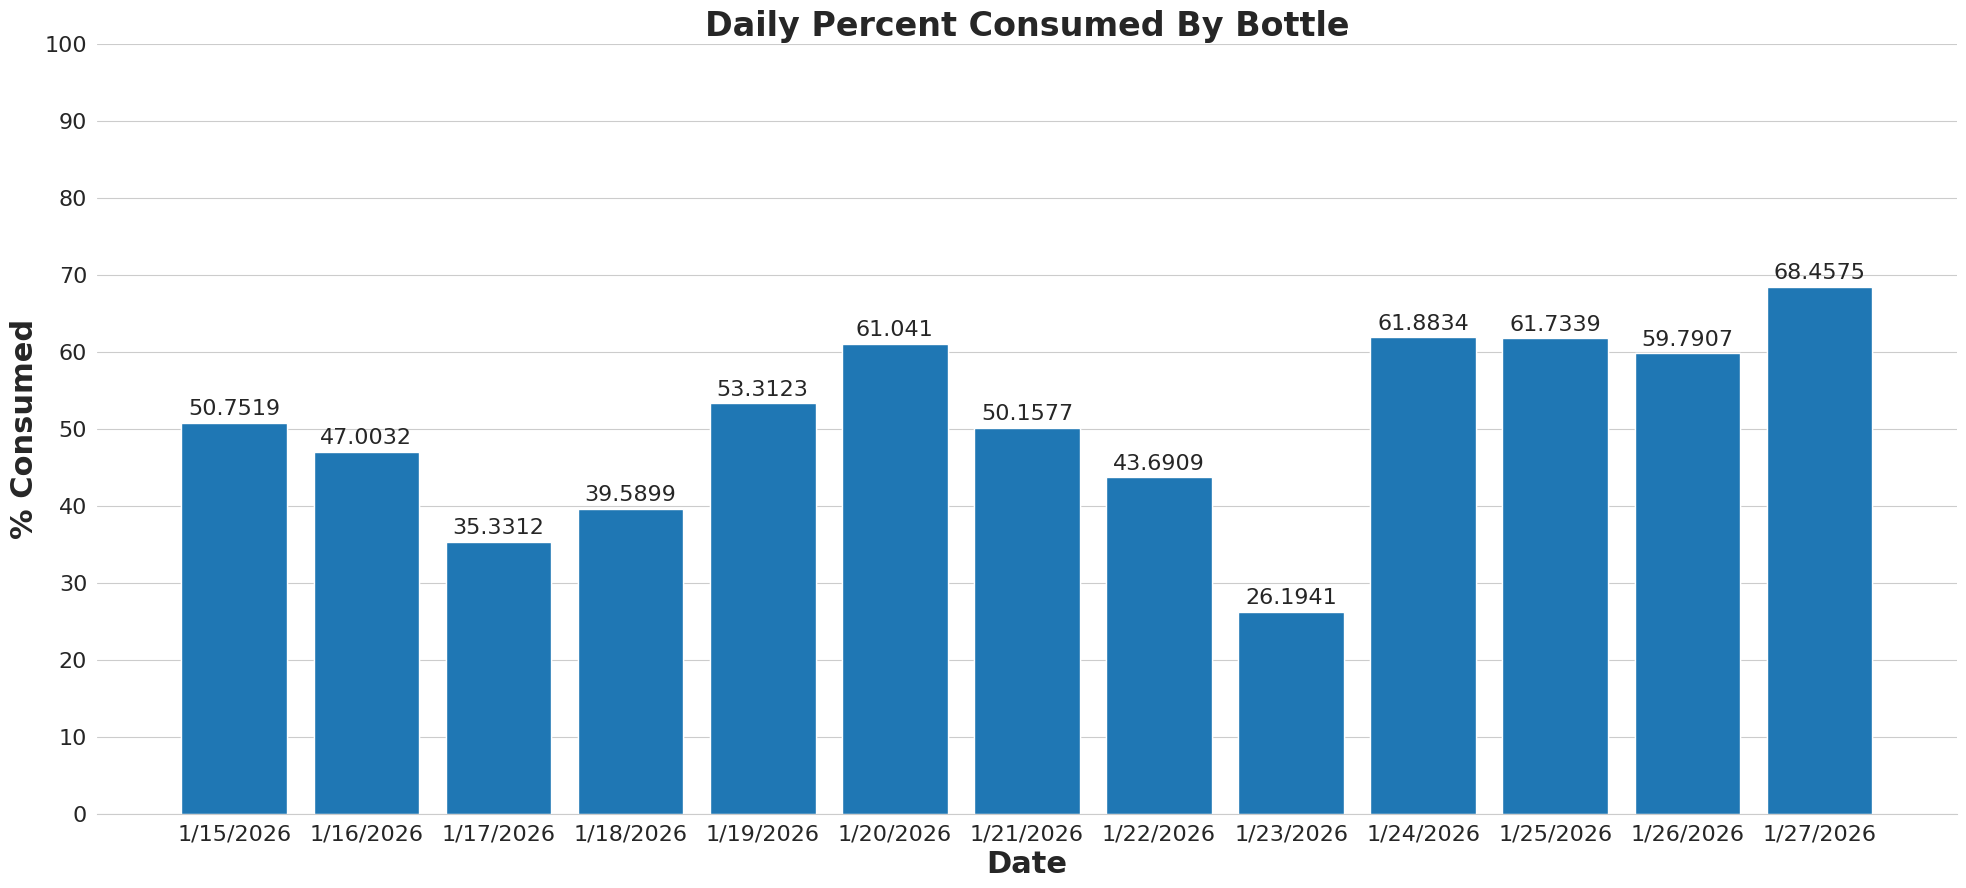

In [4]:
# Create Bar Plot
dailyTotals = df.groupby('Date')['Volume [mL]'].sum().reset_index()
dailyMax = df.groupby('Date')['Total Feed Volume [mL]'].sum().reset_index()
dailyPercent = dailyTotals['Volume [mL]']/dailyMax['Total Feed Volume [mL]']*100
#Set general plot properties
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "Total Offered"
ax = sns.barplot(x = dailyMax['Date'], y = dailyPercent, color = "darkblue")
bars = ax.bar(dailyMax['Date'], dailyPercent)
#topbar = plt.Rectangle((0,0),1,1,fc="darkblue", edgecolor = 'none')

#Optional code - Make plot look nicer
sns.despine(left=True)
ax.set_title("Daily Percent Consumed By Bottle", fontsize=24, weight = 'bold')
ax.set_ylabel("% Consumed", fontsize=22, weight = 'bold')
ax.set_xlabel("Date", fontsize=22, weight = 'bold')
#desired_ticks = np.arange(0,1.1,10)
desired_ticks = np.arange(0,110,10)
ax.set_yticks(ticks=desired_ticks) 
ax.tick_params(axis='both', labelsize=16)
#plt.xticks(rotation=45,ha='right')
# Add labels above the bars
ax.bar_label(bars, padding=3, size=16);
#Set fonts to consistent 16pt size
#for item in ([ax.xaxis.label, ax.yaxis.label] +
#             ax.get_xticklabels() + ax.get_yticklabels()):
#    item.set_fontsize(16)